In [3]:
import pystan as ps
import hypertools as hyp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
# define model
model = '''
data {
    //topic model is from stan manual p. 243
    int<lower=2> K;               //num topics
    int<lower=2> V;               //num words
    int<lower=1> M;               //num docs
    int<lower=1> N;               //total word instances
    int<lower=1,upper=V> w[N];    //word n
    int<lower=1,upper=M> doc[N];  // doc ID for word n
    vector<lower=0>[K] alpha;     // topic prior
    vector<lower=0>[V] beta;      // word prior
    vector<lower=1> S;            // num studied words
    vector<lower=1> L;            // num lists
    vector<lower=1,upper=V> studied[L, S]     // studied words from each list
    vector<lower=0,upper=V> recalled[L, S]    // correctly recalled words from each list, excluding repeats
}
parameters {
  simplex[K] theta[M];            // topic dist for doc m
  simplex[V] phi[K];              // word dist for topic k
  simplex[K] theta_s[S]
} 
model {
    for (m in 1:M)
        theta[m] ~ dirichlet(alpha);  // prior
    for (k in 1:K)
        phi[k] ~ dirichlet(beta);     // prior
    for (n in 1:N) {
        real gamma[K];
        for (k in 1:K)
            gamma[k] = log(theta[doc[n], k]) + log(phi[k, w[n]]);
        target += log_sum_exp(gamma);  // likelihood;
      }
}
'''

In [8]:
print(model)


data {
    //topic model is from stan manual p. 243
    int<lower=2> K;               //num topics
    int<lower=2> V;               //num words
    int<lower=1> M;               //num docs
    int<lower=1> N;               //total word instances
    int<lower=1,upper=V> w[N];    //word n
    int<lower=1,upper=M> doc[N];  // doc ID for word n
    vector<lower=0>[K] alpha;     // topic prior
    vector<lower=0>[V] beta;      // word prior    
}
parameters {
  simplex[K] theta[M];            // topic dist for doc m
  simplex[V] phi[K];              // word dist for topic k
} 
model {
    for (m in 1:M)
        theta[m] ~ dirichlet(alpha);  // prior
    for (k in 1:K)
        phi[k] ~ dirichlet(beta);     // prior
    for (n in 1:N) {
        real gamma[K];
        for (k in 1:K)
            gamma[k] = log(theta[doc[n], k]) + log(phi[k, w[n]]);
        target += log_sum_exp(gamma);  // likelihood;
      }
}



Text(0, 0.5, 'probability')

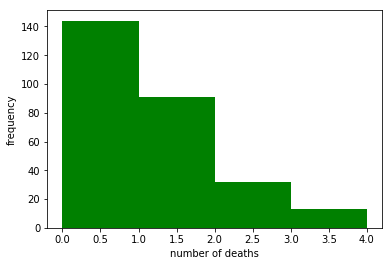

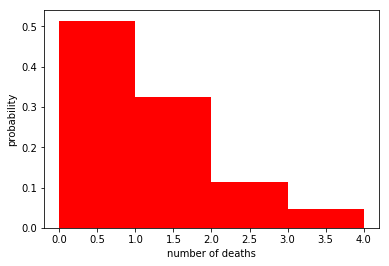

In [4]:
# create the model
model = """
data {
    int<lower = 0> N;
    int x[N];
}
parameters{
    real<lower=0, upper=1> lambda;
}
model {
    lambda ~ beta(2, 2);
    x ~ poisson(lambda);
}
"""

# number of deaths by horse or mule kicks in 10 corps of the Prussian army per year, from von Bortkiewicz
von_bort = [0]*144
von_bort.extend([1]*91)
von_bort.extend([2]*32)
von_bort.extend([3]*11)
von_bort.extend([4]*2)

# plot the data
plt.hist(von_bort, 4, facecolor='g')
plt.xlabel('number of deaths')
plt.ylabel('frequency')
plt.figure()
plt.hist(von_bort, 4, facecolor='r', density=True)
plt.xlabel('number of deaths')
plt.ylabel('probability')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_00eccc9567ed5f4ac88a50dbb5a1950b NOW.


Inference for Stan model: anon_model_00eccc9567ed5f4ac88a50dbb5a1950b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda    0.7  1.4e-3   0.05   0.61   0.66    0.7   0.73    0.8   1304    1.0
lp__   -269.5    0.02    0.8 -271.8 -269.7 -269.2 -269.0 -269.0   1188    1.0

Samples were drawn using NUTS at Tue Apr 23 20:42:09 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


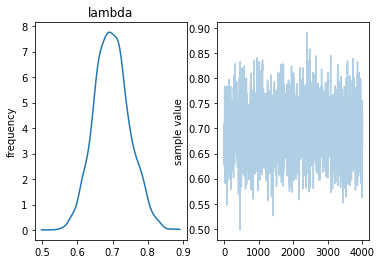

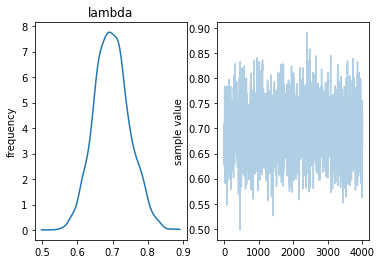

In [6]:
# put the data in a dictionary
data = {'N':len(von_bort), 'x': von_bort}

# make the model!
sm = ps.stan(model_code=model, data=data)

# print the model information
print(sm.stansummary())
sm.plot()